In [9]:
from qiskit_textbook.widgets import bv_widget
bv_widget(4, "1011", hide_oracle=False)

HTMLMath(value='$$ |0000\\rangle = |0000\\rangle $$')

Image(value=b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x01\x05\x00\x00\x01E\x08\x06\x00\x00\x00\xe5\xce\xf8…

In [2]:
import matplotlib.pyplot as plt
import numpy as np

from qiskit import IBMQ, BasicAer
from qiskit.providers.ibmq import least_busy
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister, execute

from qiskit.visualization import plot_histogram

In [3]:
n = 3
s = '011'

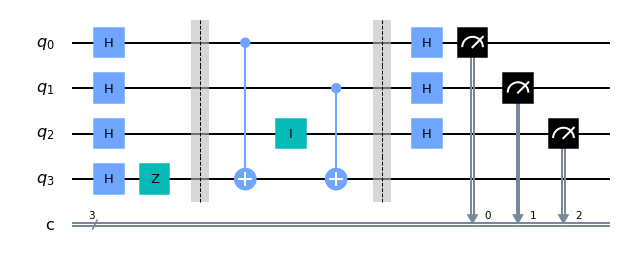

In [4]:
bv_circuit = QuantumCircuit(n+1,n)

bv_circuit.h(n)
bv_circuit.z(n)

for i in range(n):
    bv_circuit.h(i)
    
bv_circuit.barrier()

s = s[::-1]
for q in range(n):
    if s[q] == '0':
        bv_circuit.i(q)
    else:
        bv_circuit.cx(q, n)

bv_circuit.barrier()

for i in range(n):
    bv_circuit.h(i)

for i in range(n):
    bv_circuit.measure(i, i)

bv_circuit.draw('mpl')

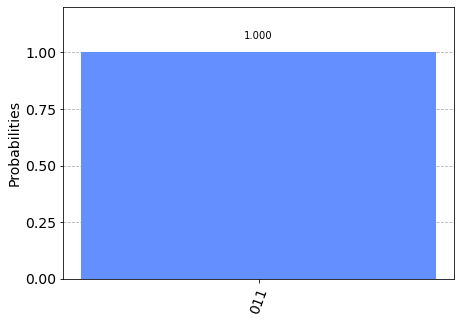

In [5]:
backend = BasicAer.get_backend('qasm_simulator')
shots = 1024
results = execute(bv_circuit, backend=backend, shots=shots).result()
answer = results.get_counts()

plot_histogram(answer)